# Comparisons In A Given Loss Landscape

In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,
)

loss_value = 0.01  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()

base_train_size = load_base_train_size(experiment_folders[0])
model_data_sizes = list_additional_data(experiment_folders[0])

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)

First entry: Model_0, base_train_size = 188
Experiment folders:  ['model_0_data_10', 'model_1_data_11', 'model_2_data_12', 'model_3_data_13', 'model_4_data_14', 'model_5_data_15', 'model_6_data_16', 'model_7_data_17', 'model_8_data_18', 'model_9_data_19']
Different data levels where loss landscapes were computed: ['data_0', 'data_1693', 'data_2634', 'data_282', 'data_3104', 'data_3575', 'data_4516', 'data_5457', 'data_6398', 'data_752']
The base train size is:  188
Data levels where models were trained:  [0, 1693, 2634, 282, 3104, 3575, 4516, 5457, 6398, 752]


## Plotting Different Model Volumes In A Landscape


Processing data modification folder: data_0


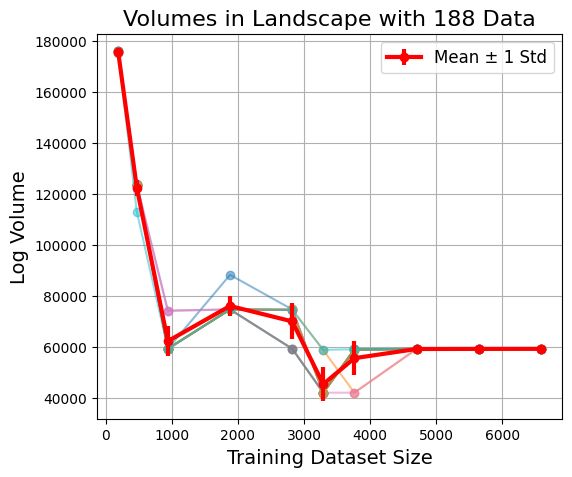

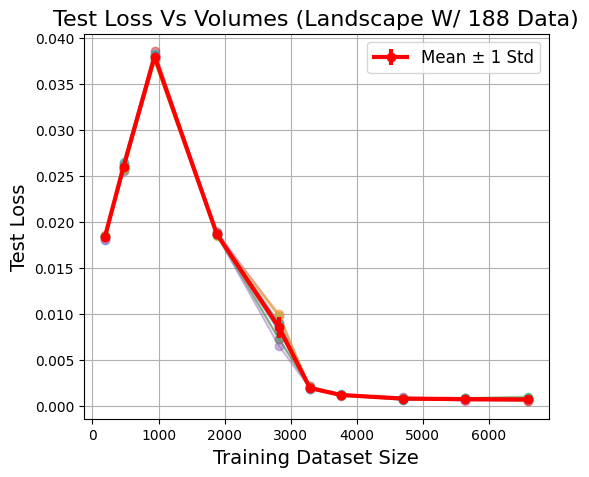

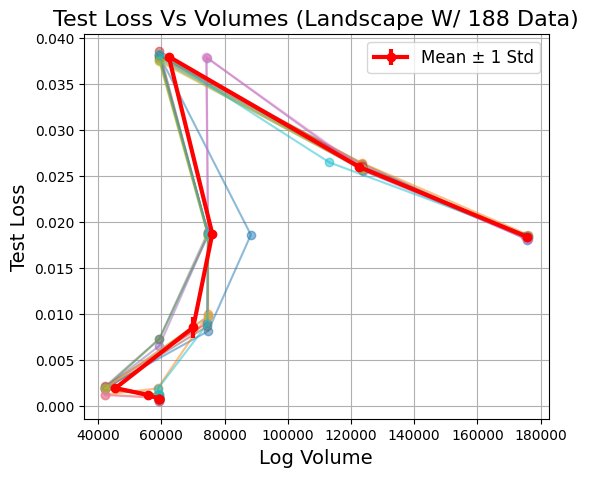


Processing data modification folder: data_1693


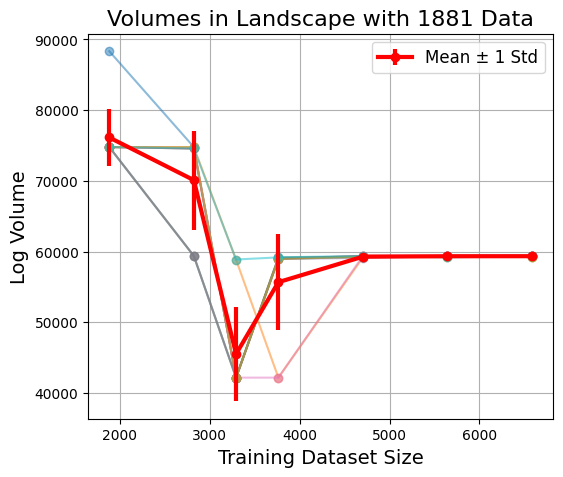

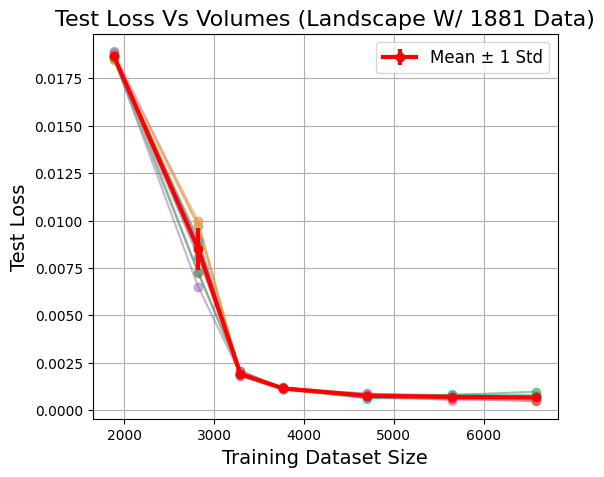

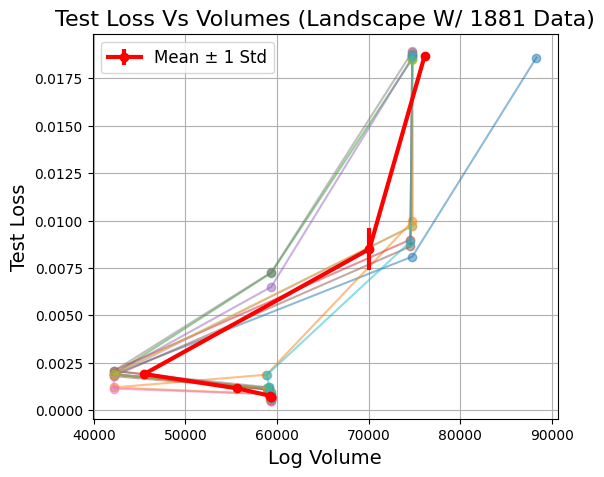


Processing data modification folder: data_2634


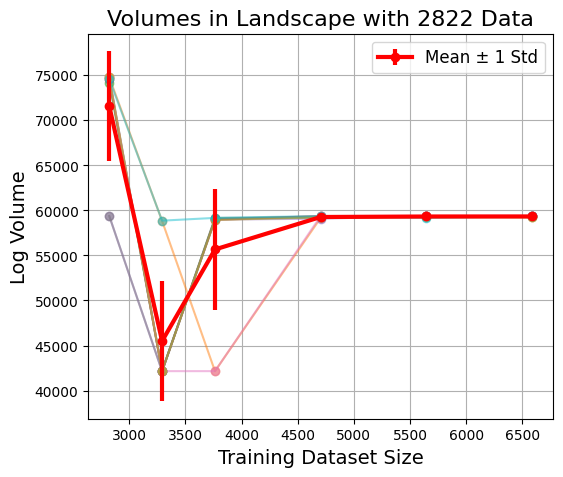

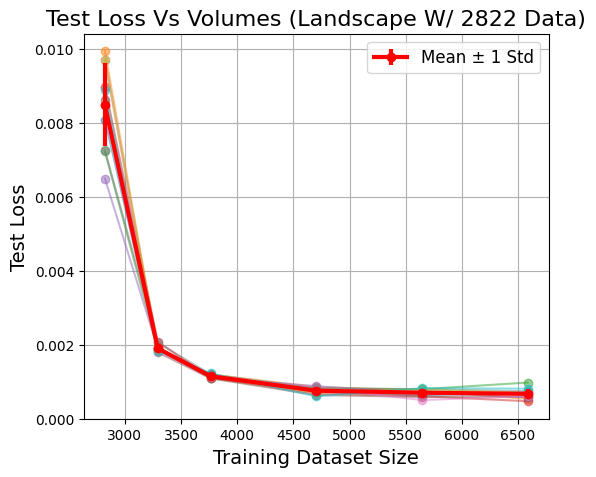

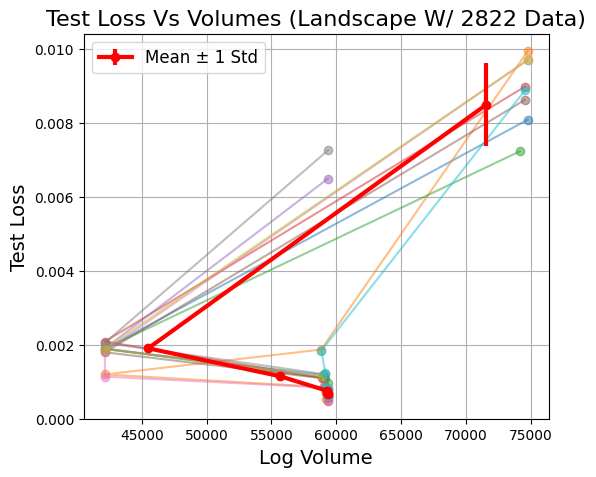


Processing data modification folder: data_282


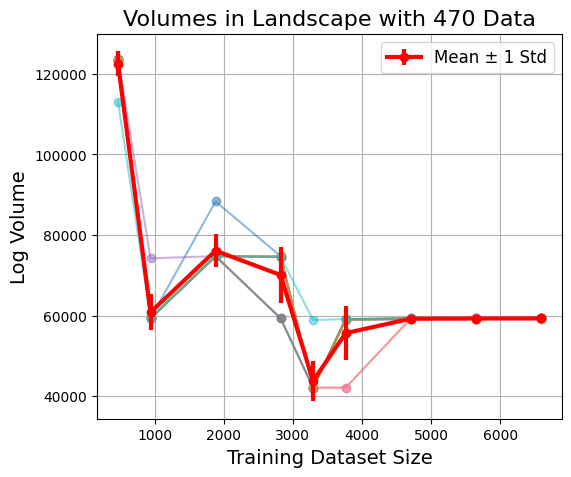

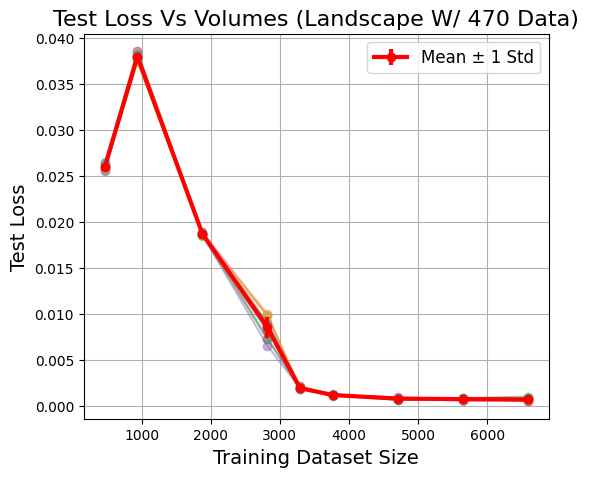

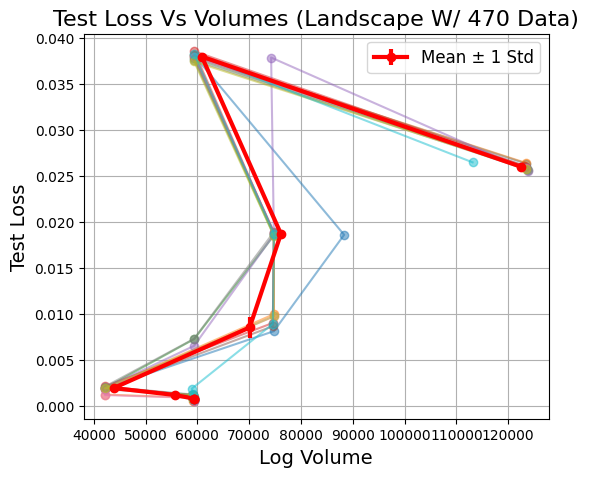


Processing data modification folder: data_3104


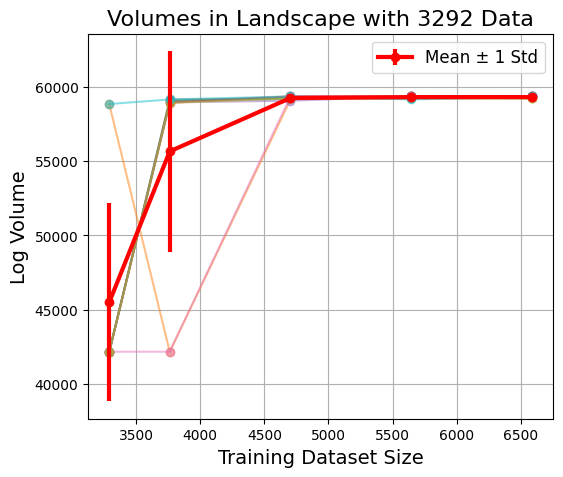

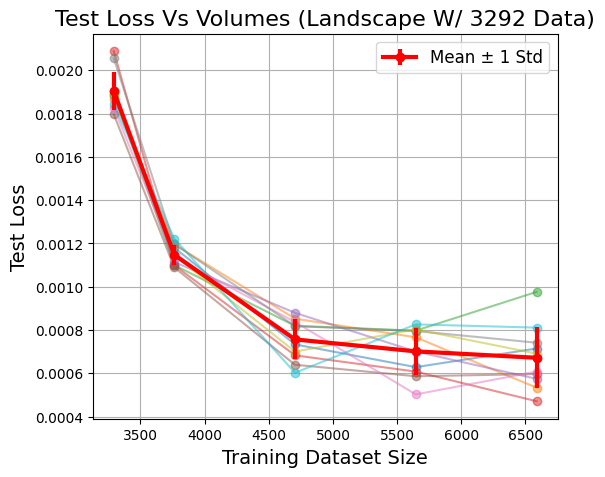

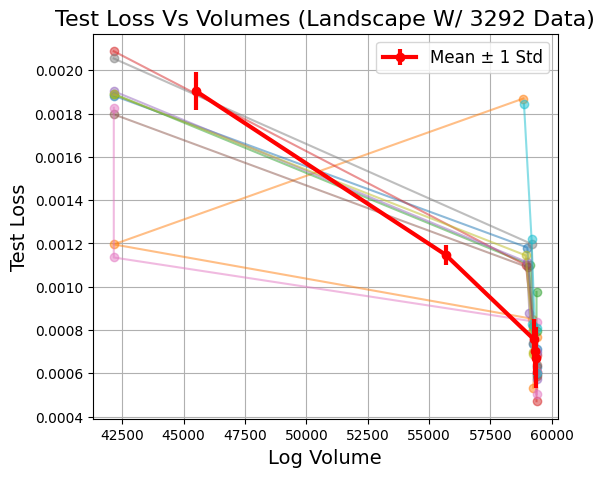


Processing data modification folder: data_3575


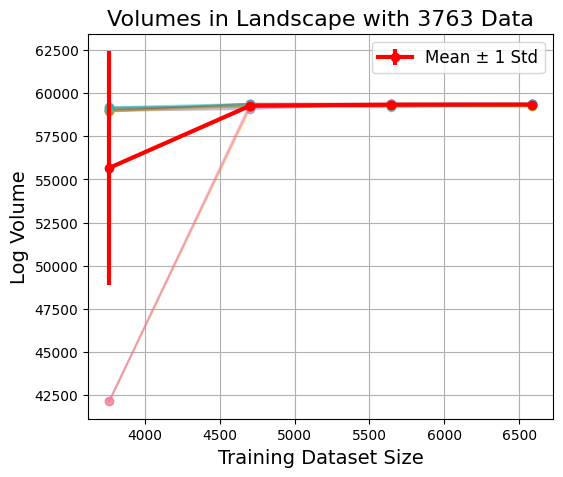

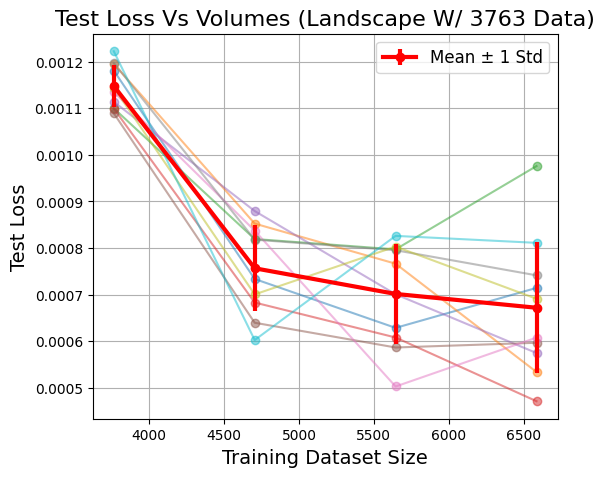

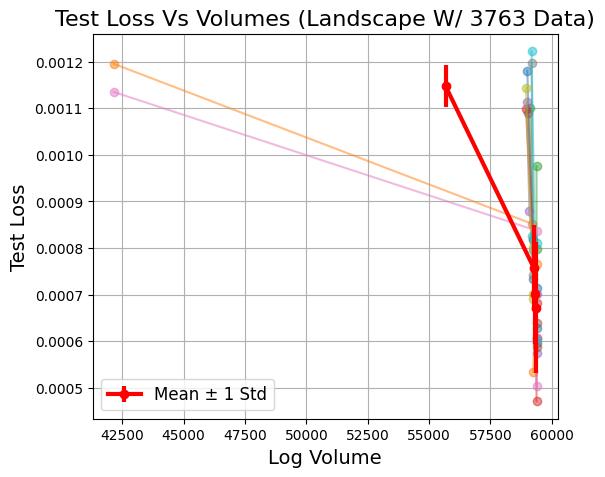


Processing data modification folder: data_4516


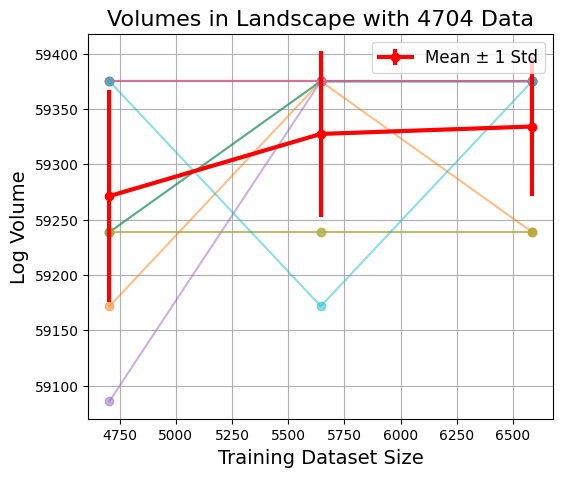

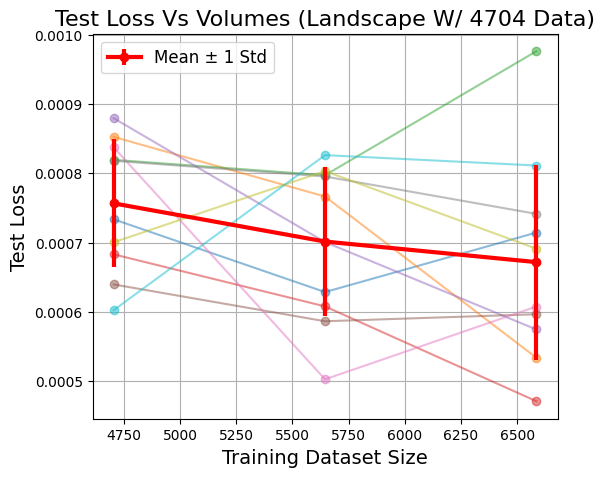

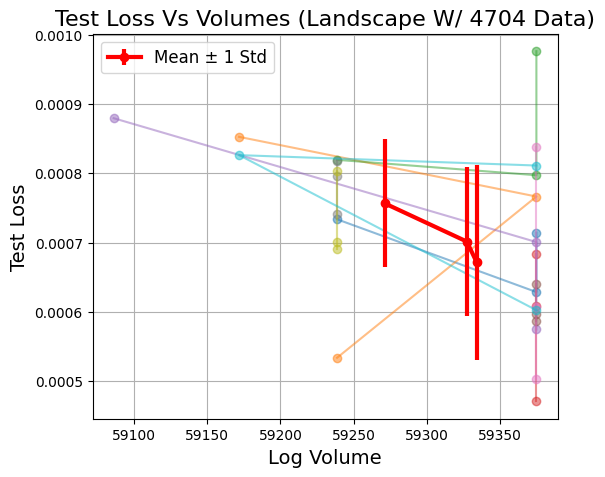


Processing data modification folder: data_5457


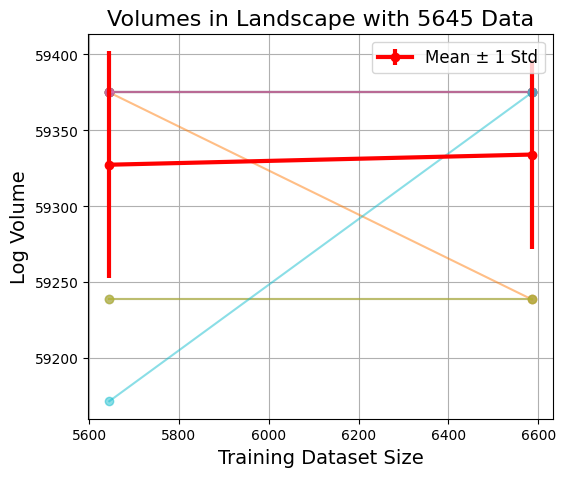

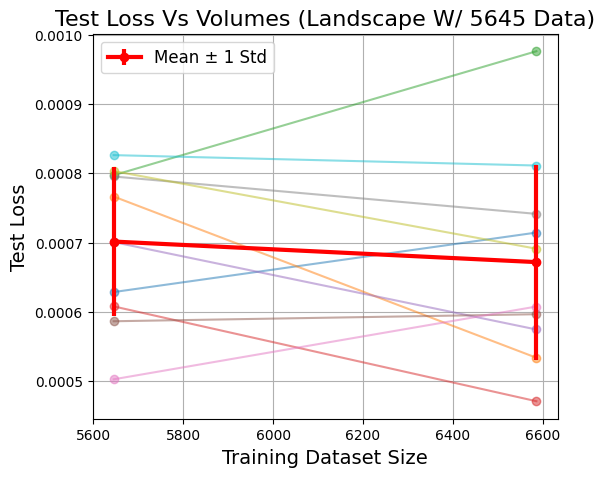

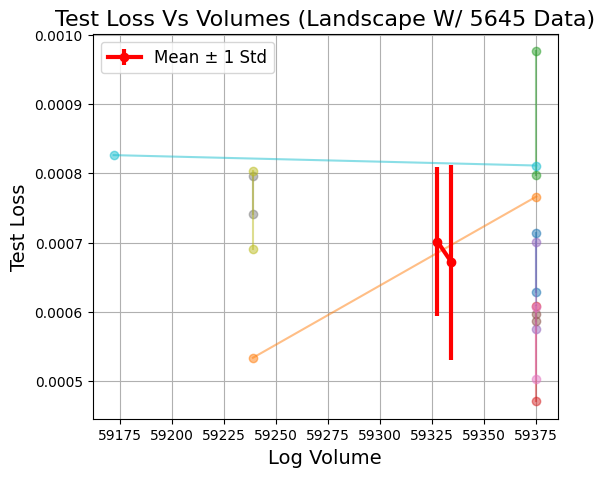


Processing data modification folder: data_6398


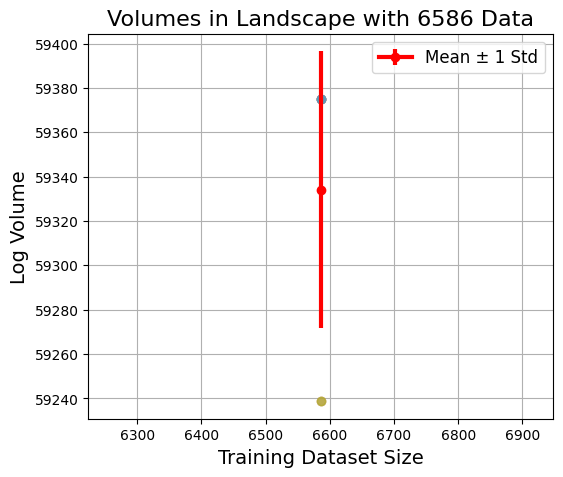

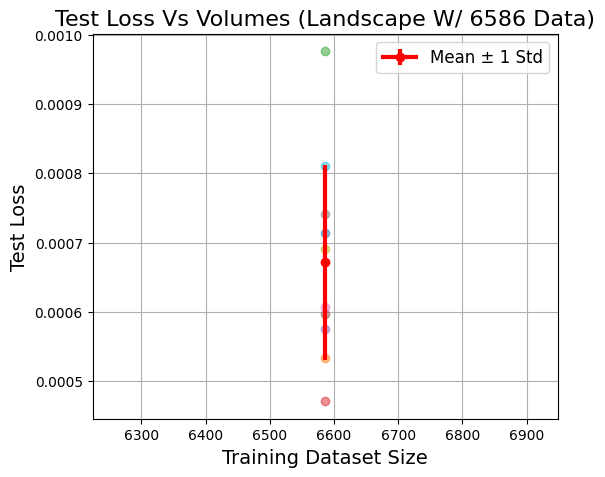

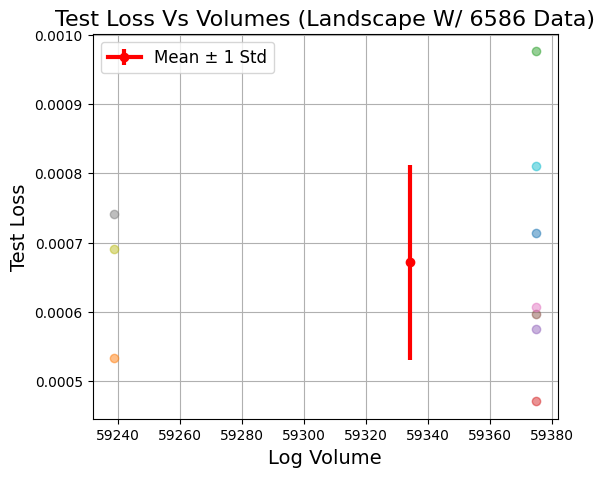


Processing data modification folder: data_752


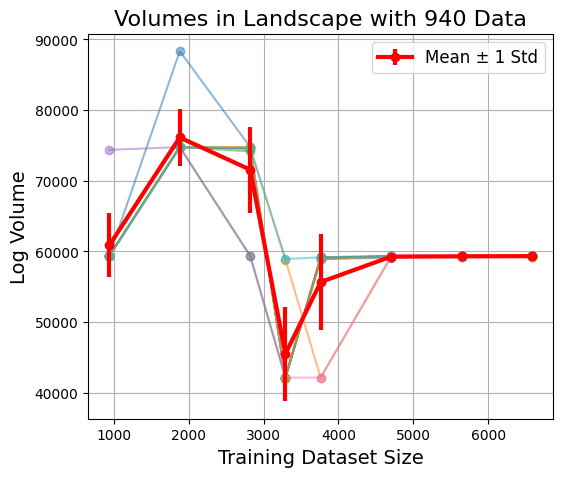

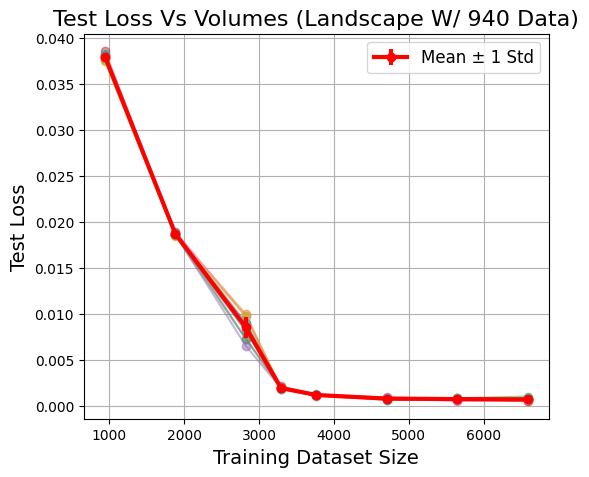

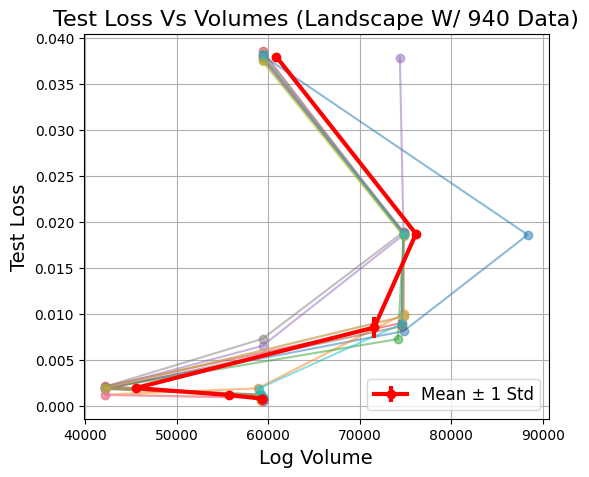

In [2]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value
    )

    # Plot: Data level vs Log Volume
    plot_fixed_landscape_minima_pair(
        all_mdl, all_log_rn,
        xlabel=labels["xlabel"], ylabel="Log Volume",
        title=labels["title_volume"],
        log_scale=data_level_log,
        ranking=False,
        alpha=0.5,
        output_dir=save_dir, filename="data_level_vs_log_volume",
        plot_average=True,
        xlabel_size=14, ylabel_size=14, title_size=16,
        base_shift=base_shift,
    )

    # Plot: Data level vs Test Loss
    plot_fixed_landscape_minima_pair(
        all_mdl, all_test_loss,
        xlabel=labels["xlabel"], ylabel="Test Loss",
        title=labels["title_loss"],
        log_scale=False,
        ranking=False,
        alpha=0.5,
        output_dir=save_dir, filename="data_level_vs_test_loss",
        plot_average=True,
        xlabel_size=14, ylabel_size=14, title_size=16,
        base_shift=base_shift,
    )

    # Plot: Log Volume vs Test Loss
    plot_fixed_landscape_minima_pair(
        all_log_rn, all_test_loss,
        xlabel="Log Volume", ylabel="Test Loss",
        title=labels["title_loss"],
        log_scale=False,
        ranking=False,
        alpha=0.5,
        output_dir=save_dir, filename="log_volume_vs_test_loss",
        plot_average=True,
        xlabel_size=14, ylabel_size=14, title_size=16
    )

    ## Rank variant
    # Plot: Data level vs Log Volume
    plot_fixed_landscape_minima_pair(
        all_mdl, all_log_rn,
        xlabel=labels["xlabel"], ylabel="Log Volume",
        title=labels["title_volume"],
        log_scale=False,
        ranking=True,
        alpha=0.5,
        output_dir=os.path.join(save_dir, "ranks"), filename="data_level_vs_log_volume",
        show_plot = False,
        plot_average=True,
        xlabel_size=14, ylabel_size=14, title_size=16,
        base_shift=base_shift,
    )

    # Plot: Data level vs Test Loss
    plot_fixed_landscape_minima_pair(
        all_mdl, all_test_loss,
        xlabel=labels["xlabel"], ylabel="Test Loss",
        title=labels["title_loss"],
        log_scale=False,
        ranking=True,
        alpha=0.5,
        output_dir=os.path.join(save_dir, "ranks"), filename="data_level_vs_test_loss",
        show_plot = False,
        plot_average=True,
        xlabel_size=14, ylabel_size=14, title_size=16,
        base_shift=base_shift,
    )

    # Plot: Log Volume vs Test Loss
    plot_fixed_landscape_minima_pair(
        all_log_rn, all_test_loss,
        xlabel="Log Volume", ylabel="Test Loss",
        title=labels["title_loss"],
        log_scale=False,
        ranking=True,
        alpha=0.5,
        output_dir=os.path.join(save_dir, "ranks"), filename="log_volume_vs_test_loss",
        show_plot = False,
        plot_average=True,
        xlabel_size=14, ylabel_size=14, title_size=16
    )

# Comparisons Across Loss Landscapes



Here, we track the performance of all models across all loss landscapes.

Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Collected results for 10 experiments
Model_0: first exceedance at index 407 (value=0.010004319250583649, threshold=0.01)
Appended cutoff for model_0_data_10 | target=0, cutoff_idx=407
Model_0: first exceedance at index 396 (value=0.010011234320700169, threshold=0.01)
Appended cutoff for model_1_data_11 | target=0, cutoff_idx=396
Model_0: first exceedance at index 405 (value=0.010017156600952148, threshold=0.01)
Appended cutoff for model_2_data_12 | target=0, cutoff_idx=405
Model_0: first exceedance at index 405 (value=0.010025536641478539, threshold=0.01)
Appended cutoff for model_3_data_13 | target=0, cutoff_idx=405
Model_0: first exceedance at index 405 (va

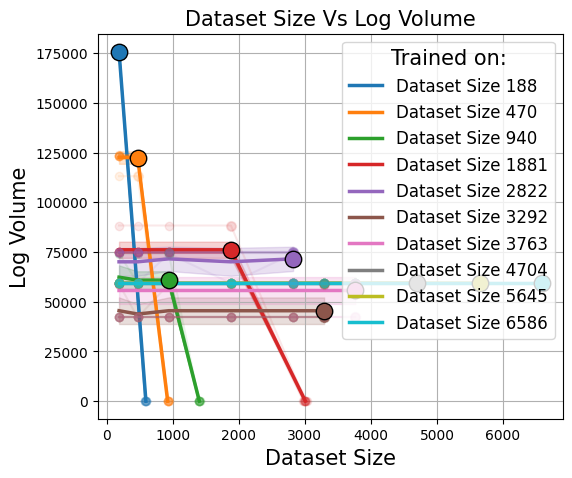

([188, 470, 940, 1881, 2822, 3292, 3763, 4704, 5645, 6586],
 [175753.78931998048,
  122486.87911002531,
  60875.60598171827,
  76134.090594768,
  71575.3741946496,
  45495.35034852514,
  55668.34794024772,
  59271.27779039217,
  59327.4375344306,
  59334.134240190186])

In [5]:
# For the poisoning experiments, this plot has no meaning

labels = varying_landscape_minima_labels(
    data_modification_folder=data_modifications[0], # Random choice to grab datatype from
    base_train_size=base_train_size,
)

results_dict = model_volume_across_targets(
    target_model_data_levels=model_data_sizes,
    loss_value=loss_value,
    experiment_folders=experiment_folders
)
results_with_cutoff = append_cutoff_points(results_dict, threshold=loss_value, base_dir=".")

plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],          # NEW: needed for correct legend labels
    base_train_size=base_train_size,  # NEW: used for dataset size shifts
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    title=labels["title_volume"],
    log_scale = data_level_log,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels",
    xlabel_size=15, ylabel_size=15, title_size=15,
    #ylim = (90000, 200000)
)

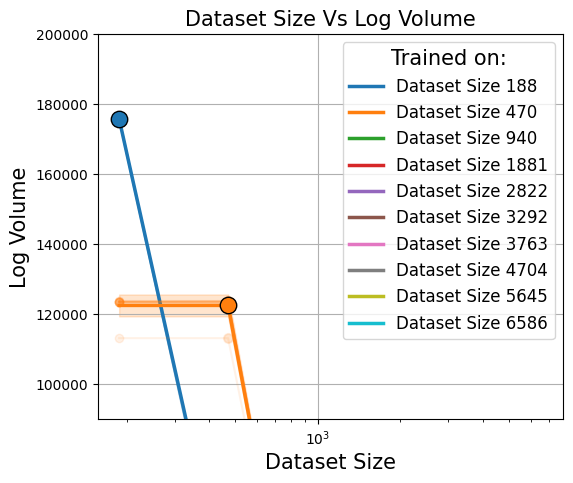

([188, 470, 940, 1881, 2822, 3292, 3763, 4704, 5645, 6586],
 [175753.78931998048,
  122486.87911002531,
  60875.60598171827,
  76134.090594768,
  71575.3741946496,
  45495.35034852514,
  55668.34794024772,
  59271.27779039217,
  59327.4375344306,
  59334.134240190186])

In [4]:
plot_minima_volume_vs_data_level(
    results_dict = results_with_cutoff,
    data_type=labels["data_type"],          # NEW: needed for correct legend labels
    base_train_size=base_train_size,  # NEW: used for dataset size shifts
    xlabel=labels["xlabel"],
    ylabel="Log Volume",
    title=labels["title_volume"],
    log_scale = True,
    alpha=0.1,
    plot_average=True,
    output_dir=base_output_dir, filename="log_volumes_vs_data_levels_log",
    xlabel_size=15, ylabel_size=15, title_size=15,
    ylim = (90000, 200000)
)